In [1]:
#Finance project - credit card fraud
#reprise du projet éponyme sur toward datascience
#améliorations : description des données, isolation forest, déploiement API

In [3]:
# chargement des librairies
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
!pip install -U imbalanced-learn
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression




  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'c:\\programdata\\anaconda3\\lib\\site-packages\\imbalanced_learn-0.7.0.dist-info\\AUTHORS.rst'
Consider using the `--user` option or check the permissions.



In [4]:
dataset = pd.read_csv("creditcard.csv")

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#etude du dataset

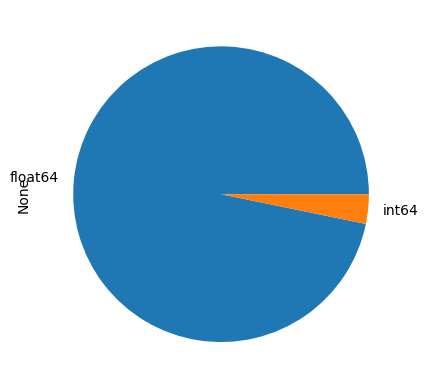

In [6]:
#types de variables
##pourcentage de valeurs en fonction de chaque type d'objets et de valeurs manquantes
dataset.dtypes.value_counts().plot.pie();

In [7]:
#nombre et type des variables

dataset.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [8]:
#shape
dataset.shape

(284807, 31)

In [9]:
#beaucoup d'individus... nous allons pouvoir créer des jeux d'entrainement et de test

In [10]:
#les nuls et les nans 
dataset.isnull().sum()
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#aucune nan

In [12]:
#traquons les valeurs infinies
# Recherchez les valeurs infinies dans le DataFrame
infinite_values = dataset.isin([np.inf, -np.inf]).any()

# Affichez les colonnes contenant des valeurs infinies
print(infinite_values)

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [13]:
#aucune valeur infinie

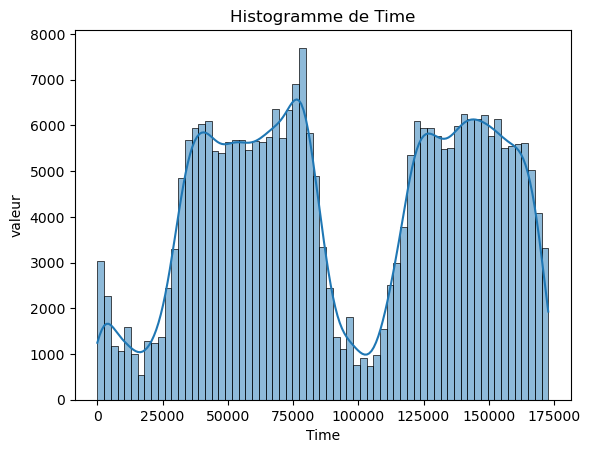

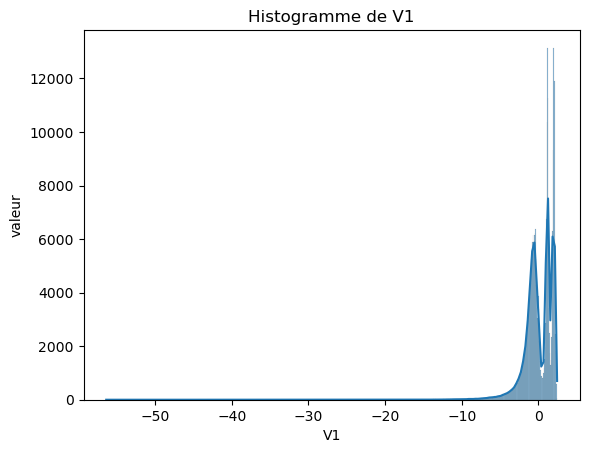

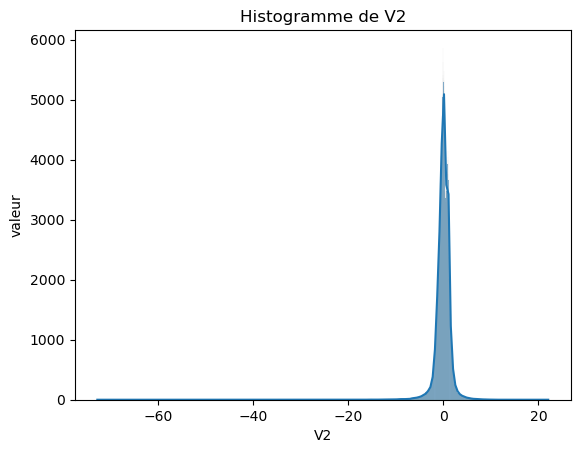

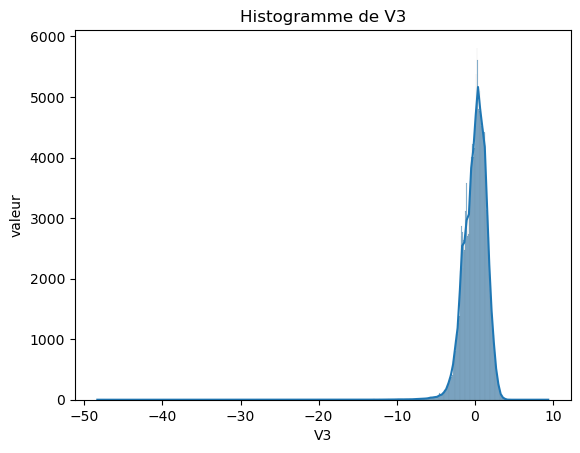

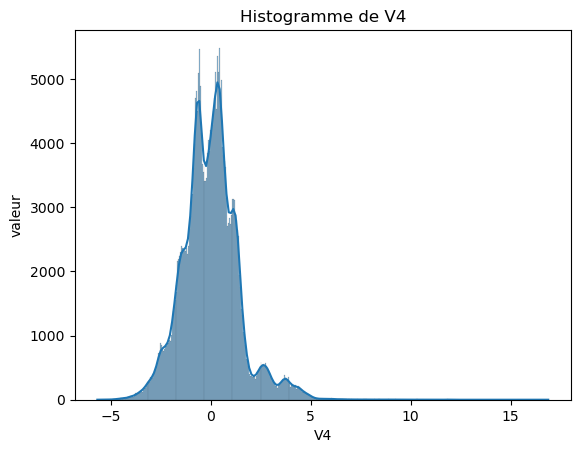

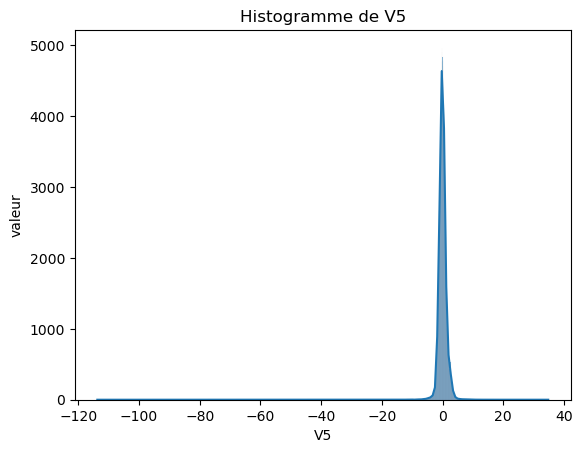

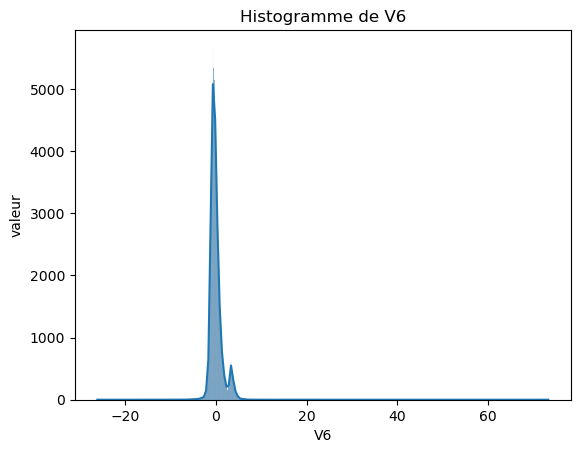

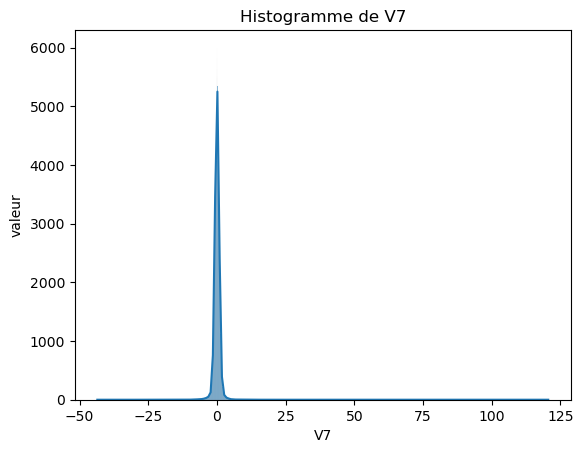

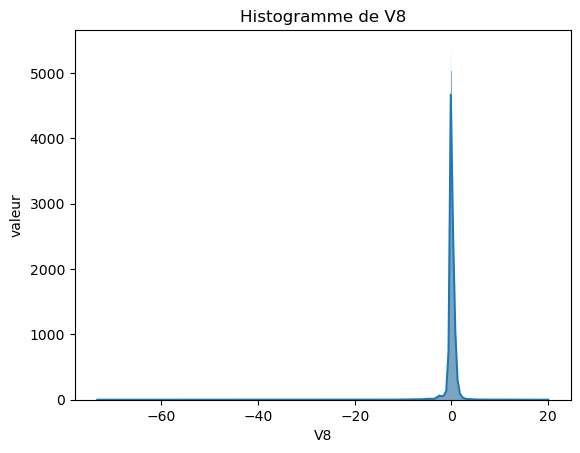

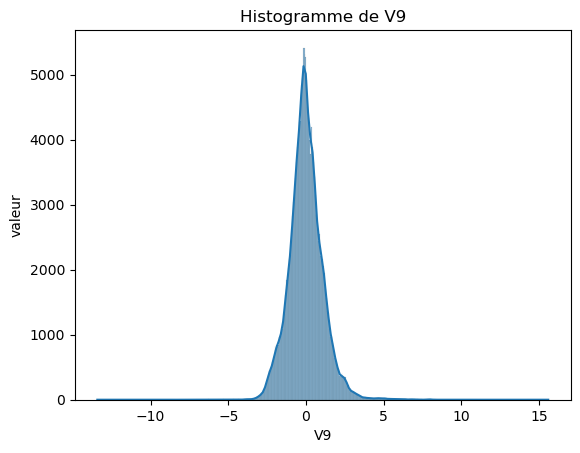

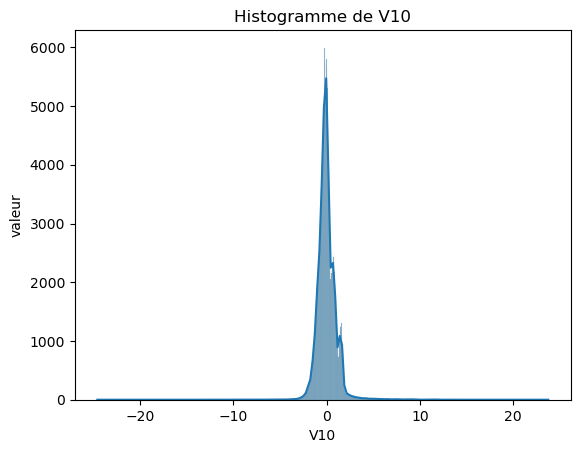

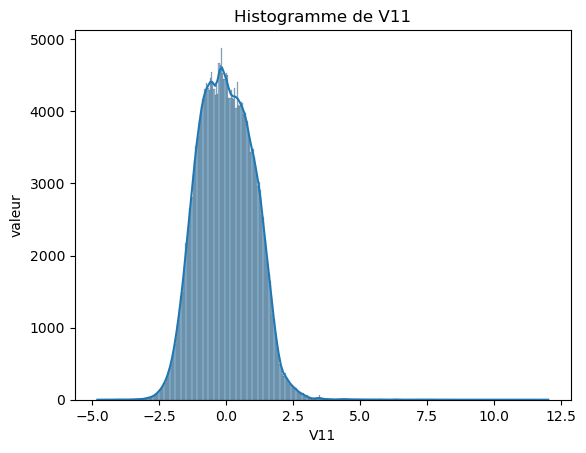

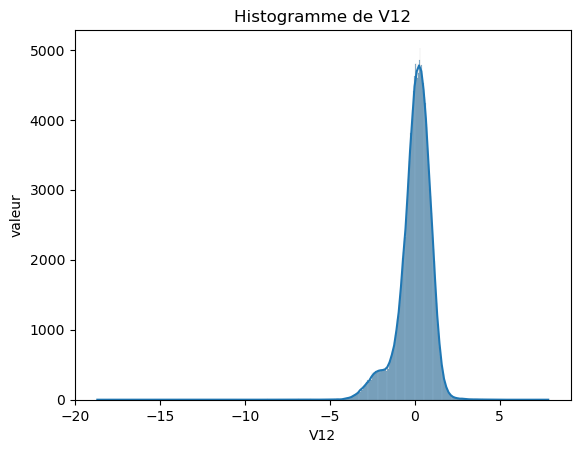

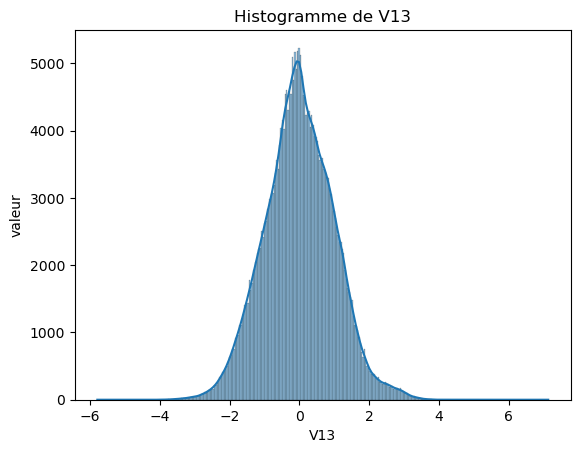

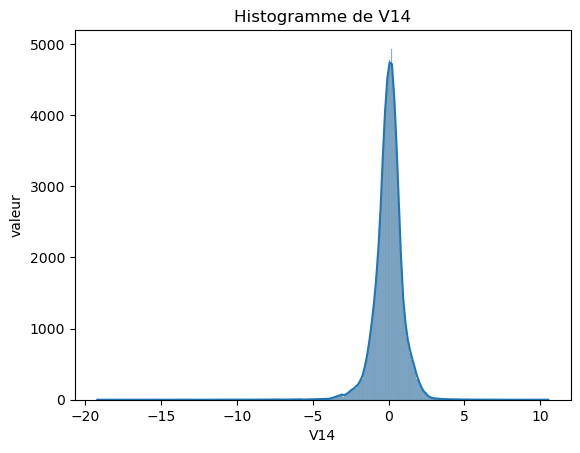

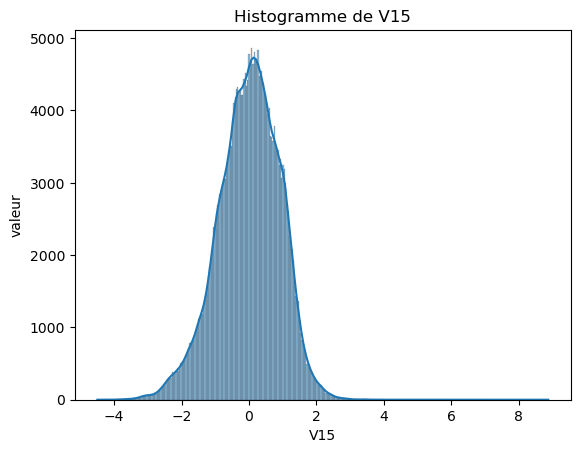

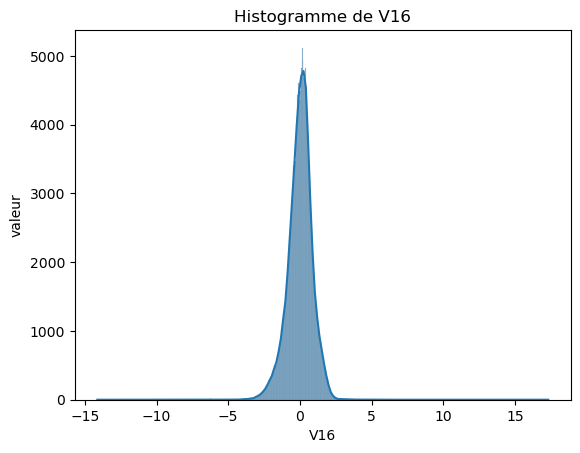

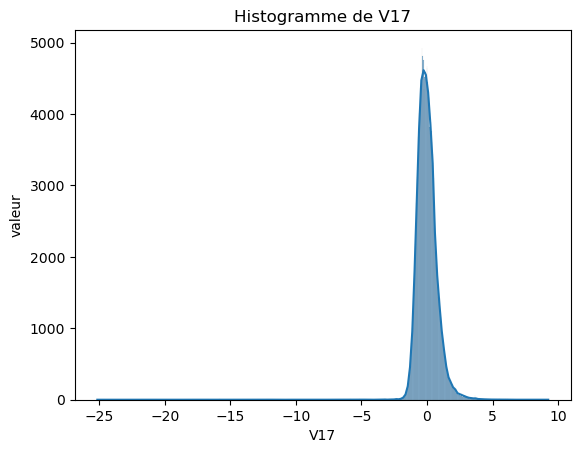

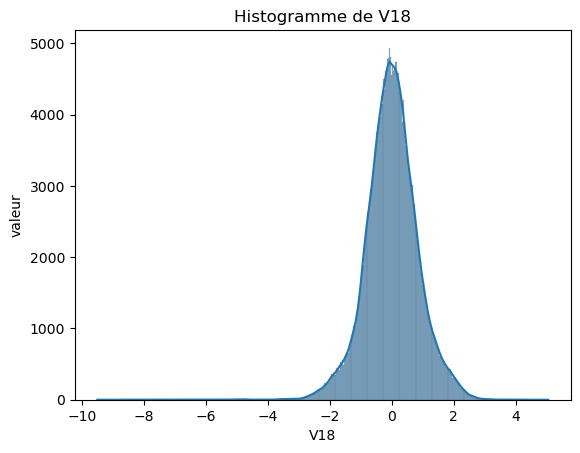

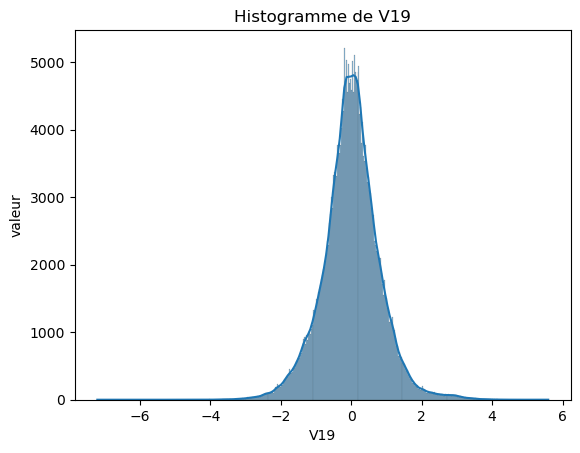

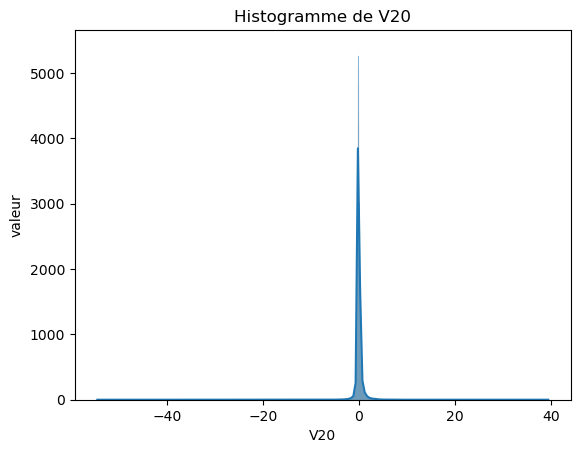

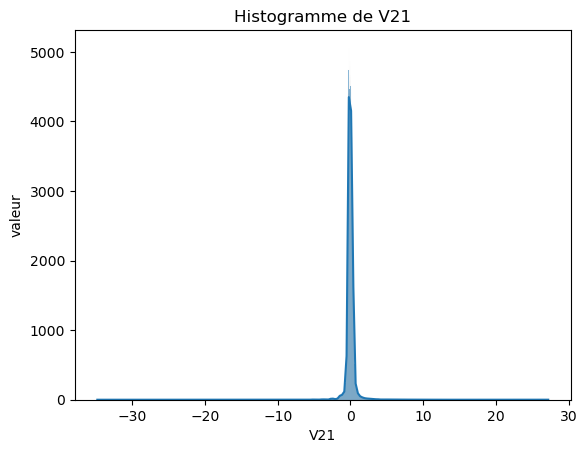

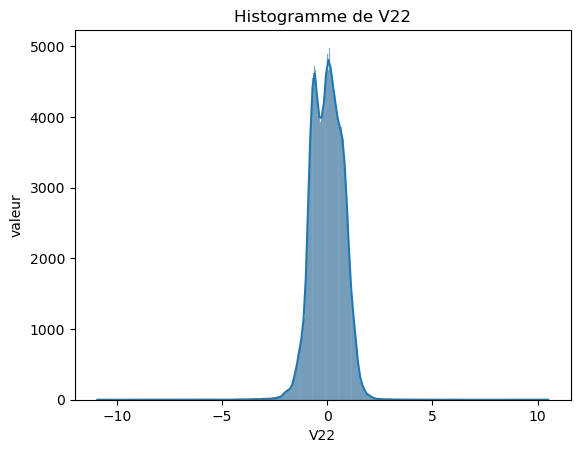

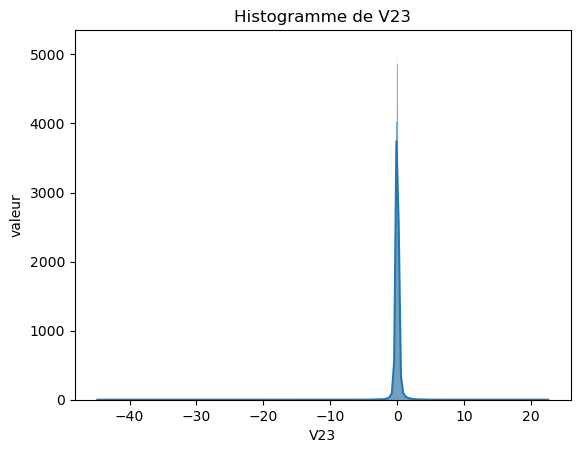

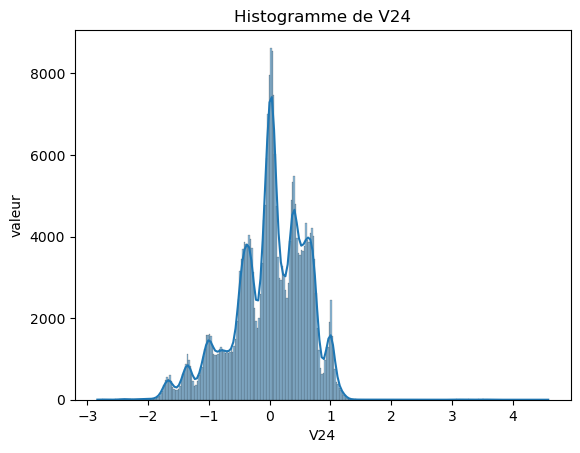

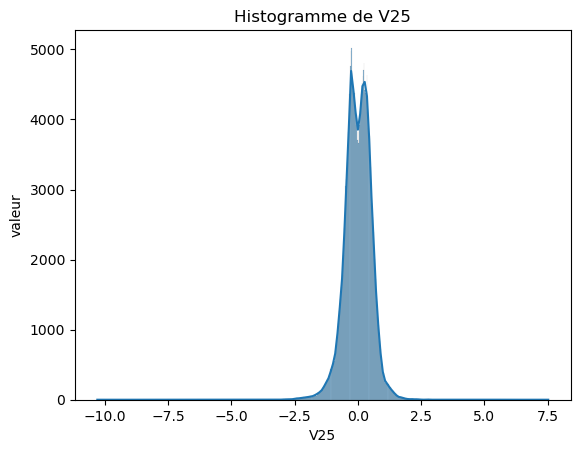

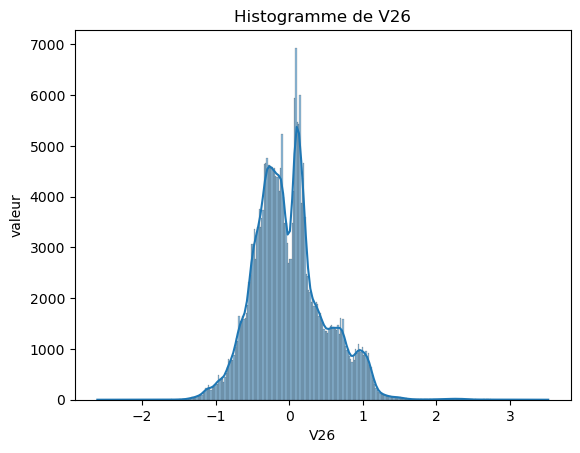

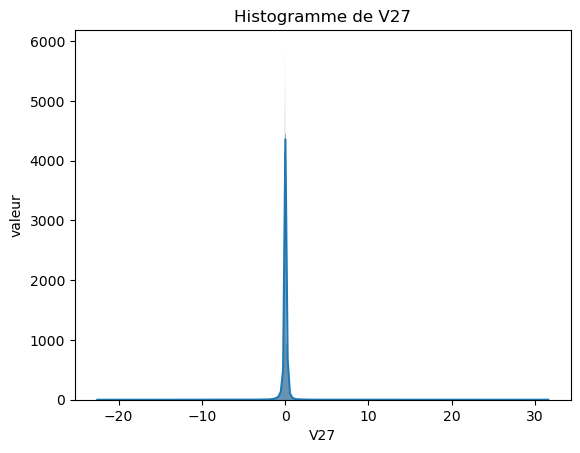

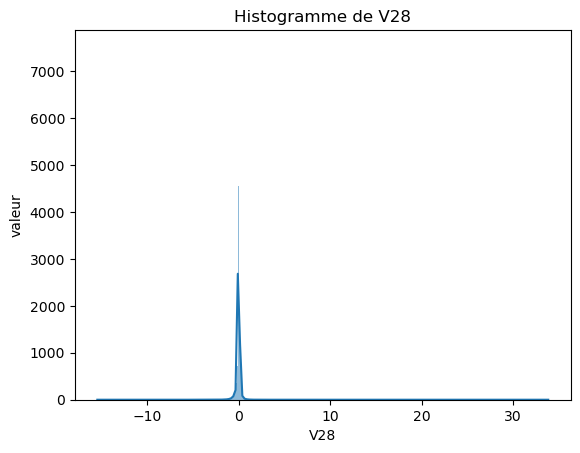

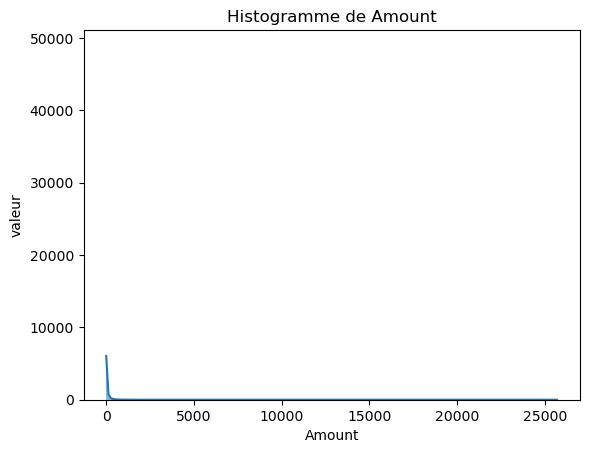

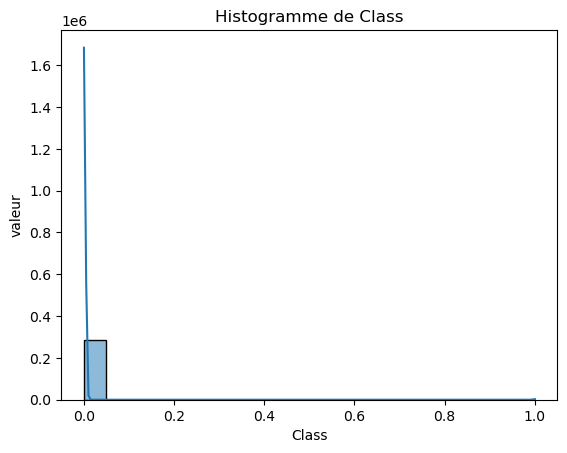

In [14]:
#analyse de la distribution des variables
import seaborn as sns

# Parcours de chaque colonne du DataFrame
for column in dataset.columns:
    # Créez un histogramme pour la variable
    sns.histplot(dataset[column], kde=True)  # Utilisez kde=True pour ajouter une estimation de la densité
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('valeur')
    plt.show()  # Affichez l'histogramme

0    284315
1       492
Name: Class, dtype: int64

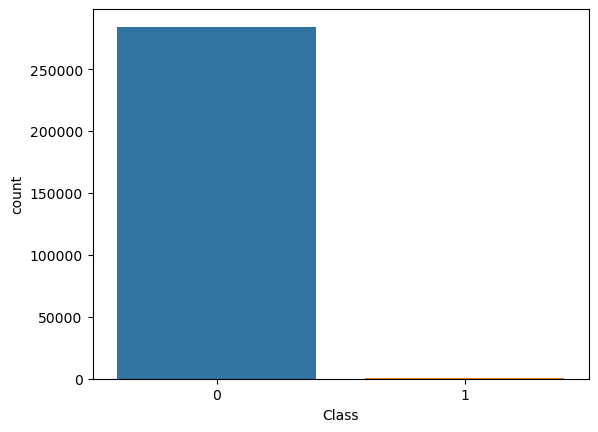

In [15]:
#regardons la cible
sns.countplot(x=dataset['Class'])
dataset["Class"].value_counts()

In [16]:
#très déséquilibré : 492 anomalies pour 284315 transactions normales

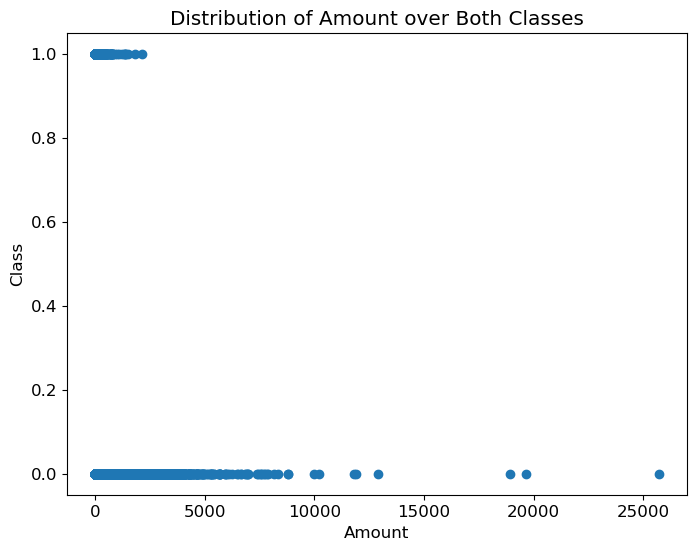

In [17]:
#regardons les cibles : montant en jeu en fonction de la classe

# Adjusting figuresize, and fontsize
plt.rcParams["figure.figsize"] = "8,6"
font = {'size': 12}
plt.rc('font', **font)

# Adding titles to the plots and axes
plt.title("Distribution of Amount over Both Classes")
plt.xlabel("Amount")
plt.ylabel("Class")

# Plotting the Amount column vs. Class Column
plt.scatter(dataset["Amount"],dataset["Class"])

In [18]:
#les fraudes concernent des petits montants...

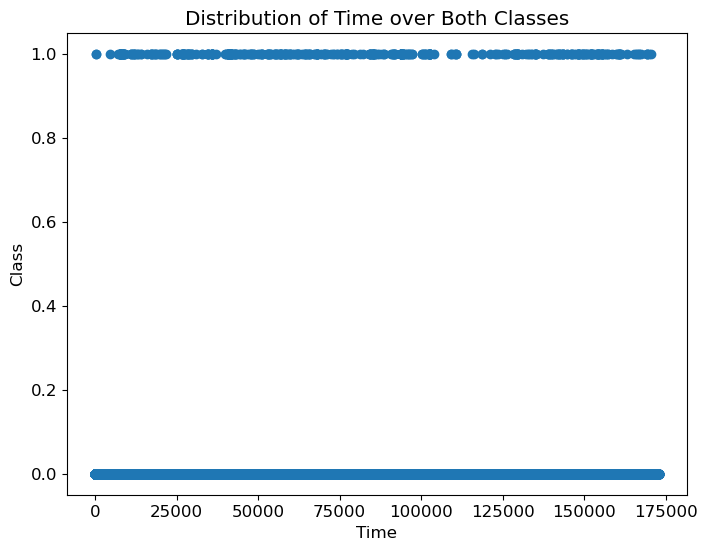

In [19]:
#regardons les cibles : temps en fonction de la classe

# Adjusting figuresize, and fontsize
plt.rcParams["figure.figsize"] = "8,6"
font = {'size': 12}
plt.rc('font', **font)

# Adding titles to the plots and axes
plt.title("Distribution of Time over Both Classes")
plt.xlabel("Time")
plt.ylabel("Class")

# Plotting the Time column vs. Class Column
plt.scatter(dataset["Time"],dataset["Class"])

Class     100.000000
V17        32.648107
V14        30.254370
V12        26.059292
V10        21.688294
V16        19.653894
V3         19.296083
V7         18.725659
V11        15.487564
V4         13.344749
V18        11.148525
V1         10.134730
V9          9.773269
V5          9.497430
V2          9.128865
V6          4.364316
V21         4.041338
V19         3.478301
V20         2.009032
V8          1.987512
V27         1.757973
Time        1.232257
V28         0.953604
V24         0.722091
Amount      0.563175
V13         0.456978
V26         0.445540
V15         0.422340
V25         0.330771
V23         0.268516
V22         0.080532
Name: Class, dtype: float64


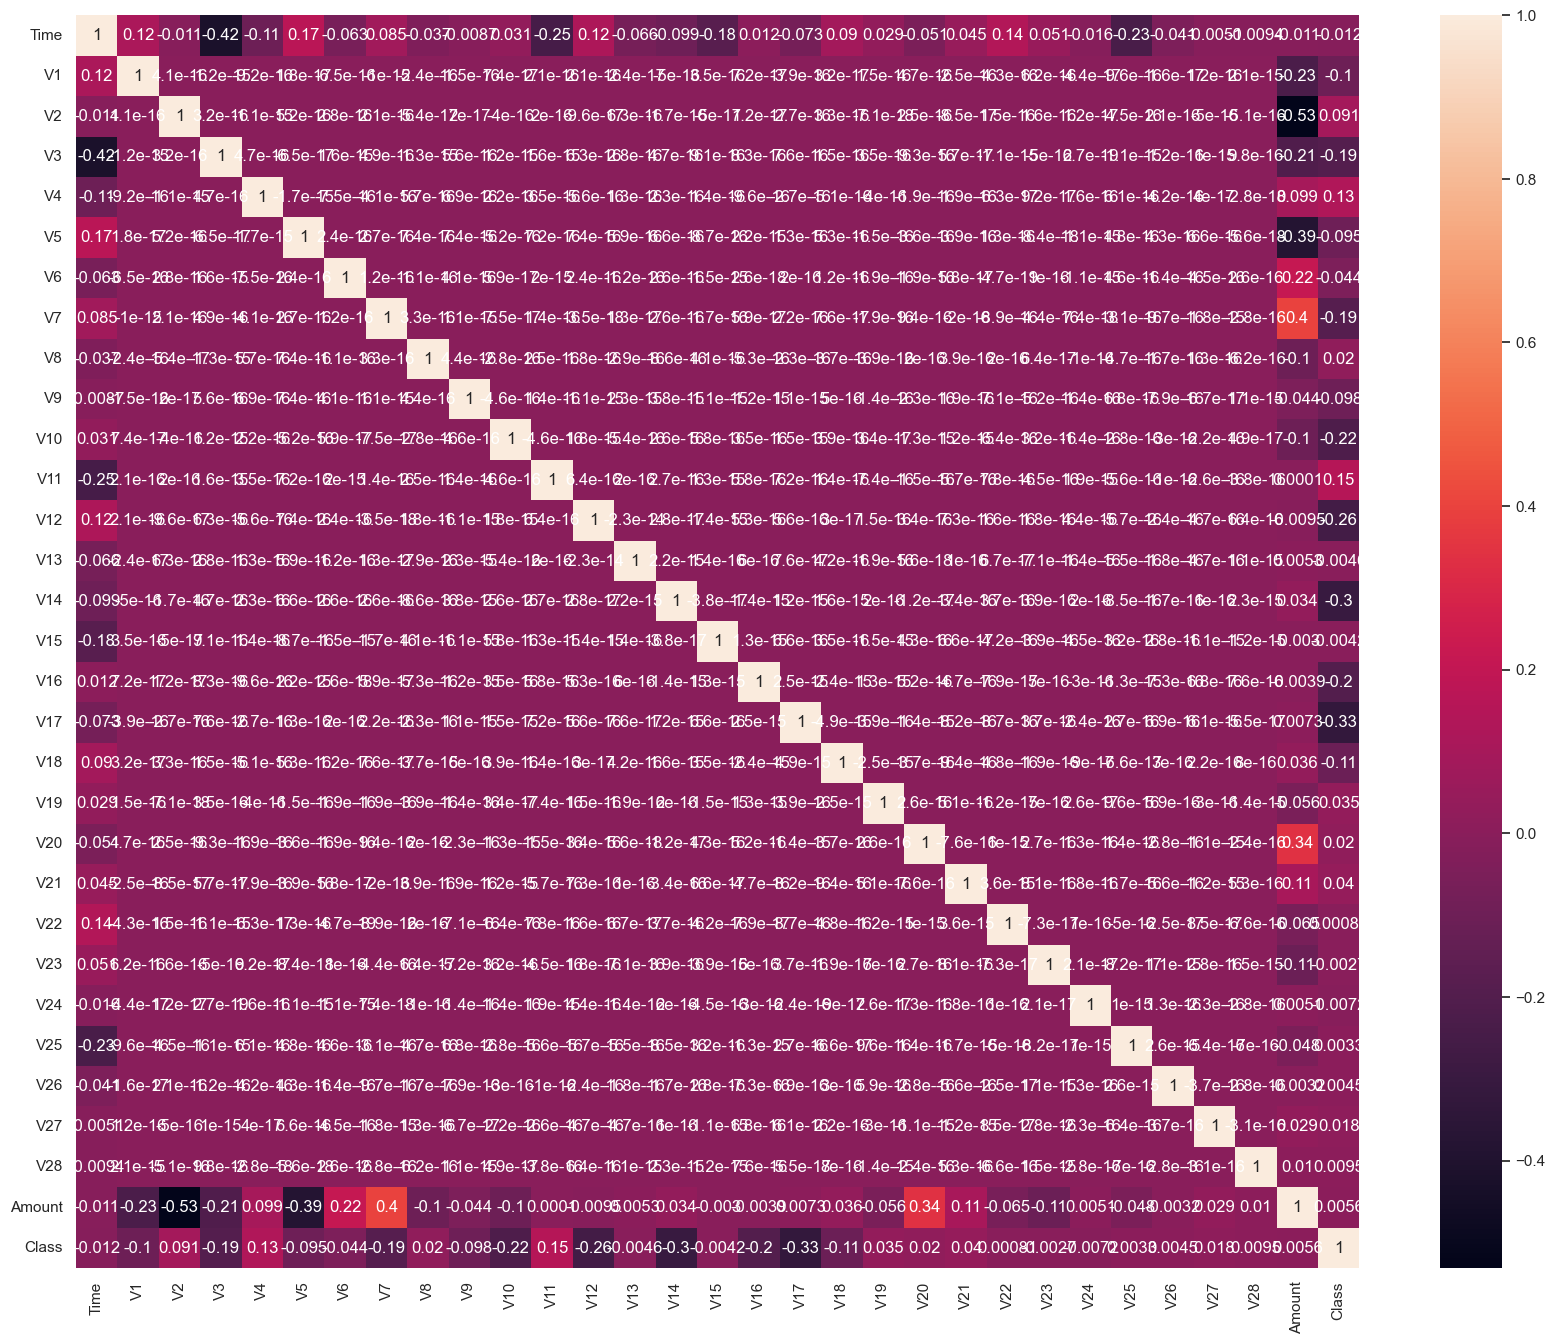

In [20]:
#matrice de corrélation

#matrice de corrélation en "heatmap" :
Var_Corr = dataset.corr()
sns.set(rc={'figure.figsize':(20.7,16.27)})
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

#Affichage en valeur absolue pour filtrer les variables < 5% par ordre d'importance de
#corrélation (positive ou négative) à la variable cible.
print(100*abs(Var_Corr['Class']).sort_values(ascending = False))

In [21]:
#aucune correlation (positive ou négative) significative
#on peut se débarrasser de time. Nous garderons le reste

In [22]:
#répartition de X et Y

X = dataset.drop(["Class","Time"],axis=1).values 
y = dataset["Class"].values 

#création des jeux train et test : 25% dans le test, seed fixe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
    random_state = 42)

In [23]:
#normalisation standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
#3 hypothèses de travail : 
#- isolation forest
#oversampling smote (rééquilobrage des classes) et classification (régression logistique, random forest)
#vu que nous avons plus de 10K individus, nous pouvons tenter un réseau de neurones

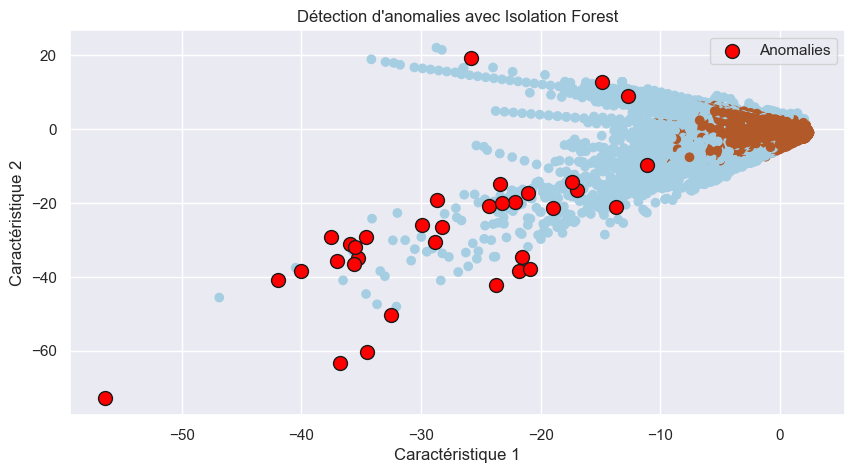

In [26]:
#isolation forest
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest

#entrainer et prédire
IF = IsolationForest(n_estimators=100, contamination=.03)
predictions = IF.fit_predict(X)

# Prédire les anomalies
y_pred = IF.predict(X)

# Afficher les résultats
plt.figure(figsize=(10, 5))

# Afficher les points de données
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Paired, marker='o')

# Encercler les anomalies
radius = (IF.decision_function(X).max() - IF.decision_function(X).min()) / 2
anomaly_score = IF.decision_function(X)
outliers = X[anomaly_score < -radius]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', s=100, edgecolors='k', marker='o', label='Anomalies')

#afficher la figure
plt.title("Détection d'anomalies avec Isolation Forest")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.legend()
plt.show()

In [27]:
#comparaison des résultats de l'isolation forest avec les données réelles

# Prédire les anomalies
y_pred = IF.predict(X)

# Calculer la matrice de confusion
confusion = confusion_matrix(y, y_pred)
n_anomalies_reelles = np.sum(y == 1)
n_anomalies_detectees = confusion[1, 0]

#matrice de confusion
print(pd.crosstab(y, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))


# Afficher les résultats
print("Nombre d'anomalies réelles :", n_anomalies_reelles)
print("Nombre d'anomalies détectées :", n_anomalies_detectees)

Classe prédite    -1       1
Classe réelle               
0               8189  276126
1                356     136
Nombre d'anomalies réelles : 492
Nombre d'anomalies détectées : 8189


In [28]:
#l'isolation forest ne convient pas : elle est incapable de différencer vrais et faux négatifs.
#peut etre faudra t-il retenter avec un oversampling

In [34]:
#oversamplimg Smote Borderline (eviter de prendre en compte les outliers lors de la génération des données)

borderlineSMOTE = BorderlineSMOTE(k_neighbors = 10, random_state = 42)
X_smt, y_smt = borderlineSMOTE.fit_resample(X, y)

#création des jeux train et test : 25% dans le test, seed fixe
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size = 0.25, 
    random_state = 42)

In [30]:
#normalisation standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
#regardons la cible
y_smt = pd.DataFrame(y_smt)
y_smt.value_counts()

0    284315
1    284315
dtype: int64

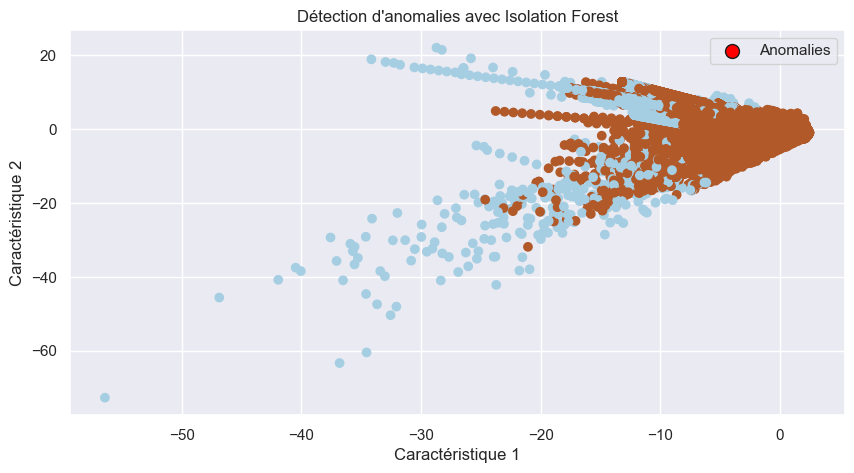

In [32]:
#isolation forest, à partir du jeu amplifié
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest

#entrainer et prédire
IF = IsolationForest(n_estimators=100, contamination=.03)
predictions = IF.fit_predict(X_smt)

# Prédire les anomalies
y_pred = IF.predict(X_smt)

# Afficher les résultats
plt.figure(figsize=(10, 5))

# Afficher les points de données
plt.scatter(X_smt[:, 0], X_smt[:, 1], c=y_pred, cmap=plt.cm.Paired, marker='o')

# Encercler les anomalies
radius = (IF.decision_function(X_smt).max() - IF.decision_function(X_smt).min()) / 2
anomaly_score = IF.decision_function(X_smt)
outliers = X_smt[anomaly_score < -radius]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', s=100, edgecolors='k', marker='o', label='Anomalies')

#afficher la figure
plt.title("Détection d'anomalies avec Isolation Forest")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.legend()
plt.show()

In [35]:
#comparaison des résultats de l'isolation forest avec les données réelles

# Prédire les anomalies
y_pred = IF.predict(X_smt)

# Calculer la matrice de confusion
confusion = confusion_matrix(y_smt, y_pred)
n_anomalies_reelles = np.sum(y_smt == 1)
n_anomalies_detectees = confusion[1, 0]

#matrice de confusion
print(pd.crosstab(y_smt, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))


# Afficher les résultats
print("Nombre d'anomalies réelles :", n_anomalies_reelles)
print("Nombre d'anomalies détectées :", n_anomalies_detectees)

Classe prédite     -1       1
Classe réelle                
0                 439  283876
1               11284  273031
Nombre d'anomalies réelles : 284315
Nombre d'anomalies détectées : 439


In [36]:
#l'isolation forest n'offre pas les performances attendues.
#écartons cette hypothèse de travail
#passons à la random forest

In [37]:
#Random Forest Classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rf = RandomForestClassifier(n_estimators = 15, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


#predire
Y_pred_train_rf = rf.predict(X_train)
Y_pred_test_rf = rf.predict(X_test)


#obtenir l'accuracy
acc_train_rf = accuracy_score(y_train, Y_pred_train_rf)
acc_test_rf = accuracy_score(y_test, Y_pred_test_rf)

#obtenir le F1 score
f1score_train_rf = f1_score(y_train, Y_pred_train_rf, average='macro')
f1score_test_rf = f1_score(y_test, Y_pred_test_rf, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_rf, "acc_test :", acc_test_rf)
print("F1score_train : ", f1score_train_rf, "F1score_test : ", f1score_test_rf)

#matrice de confusion
print(pd.crosstab(y_test, Y_pred_test_rf, rownames=['Classe réelle'], colnames=['Classe prédite']))

acc_train :  0.9999835862612317 acc_test : 0.9998241393379198
F1score_train :  0.9999835862600381 F1score_test :  0.9998241392019487
Classe prédite      0      1
Classe réelle               
0               71004     19
1                   6  71129


In [38]:
#très bonne classification !

In [39]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#vu que nous allons utiliser des algos avec des hyperparamètres différents, 
# nous ne pouvons pas systématiser sous la forme d'une boucle

#fit
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predire
Y_pred_train_logreg = classifier.predict(X_train)
Y_pred_test_logreg = classifier.predict(X_test)


#obtenir l'accuracy
acc_train_logreg = accuracy_score(y_train, Y_pred_train_logreg)
acc_test_logreg = accuracy_score(y_test, Y_pred_test_logreg)

#obtenir le F1 score
f1score_train_logreg = f1_score(y_train, Y_pred_train_logreg, average='macro')
f1score_test_logreg = f1_score(y_test, Y_pred_test_logreg, average='macro')

#afficher l'accuracy et F1 score
print("acc_train : ", acc_train_logreg, "acc_test :", acc_test_logreg)
print("F1score_train : ", f1score_train_logreg, "F1score_test : ", f1score_test_logreg)

#Afficher une matrice de confusion pour comparer les classes réelles et prédites.
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#matrice de confusion
print(pd.crosstab(y_test, Y_pred_test_logreg, rownames=['Classe réelle'], colnames=['Classe prédite']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


acc_train :  0.9860061152901011 acc_test : 0.9859592847395152
F1score_train :  0.9860057688255888 F1score_test :  0.9859590684070437
Classe prédite      0      1
Classe réelle               
0               70360    663
1                1333  69802


In [40]:
##performances largement acceptables, mais plus faible que RF

In [ ]:
#le réseau de neurones
'''
    An input layer of 64 neurons with ReLU activation
    Two dense hidden layers of 32 and 16 neurons respectively, each with a ReLU activation
    An output layer of 1 neuron with a sigmoid activation

Additionally, we have:

    An Adam optimizer with a learning rate of 1e-4 and a decay of 1e-6
    Loss of Binary Crossentropy and metrics of precision and F1

The model will be trained on 5 epochs

Note :  je vais ajouter des couches de dropout avec un taux de dropout de 0.5. 
Le dropout est une technique de régularisation qui aide à prévenir
le surapprentissage en désactivant aléatoirement un pourcentage des neurones
lors de l'entraînement. Cela permet d'améliorer la généralisation du modèle.

'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import add, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential()

model.add(Dense(64,input_dim=29,activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation = 'sigmoid'))

opt = Adam(learning_rate=1e-4, decay=1e-6)

model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['Precision','F1'])

model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))


#prédire
# Effectuer des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Convertir les prédictions en classes binaires (0 ou 1)
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
# évaluer le modèle
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

# Calculer la matrice de confusion
confusion = confusion_matrix(y_test, y_pred_binary)

# Calculer la précision, le rappel (recall), et le F1-score
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Afficher la matrice de confusion et les métriques de performance
print("Matrice de confusion :")
print(confusion)
print("Précision :", precision)
print("Rappel :", recall)
print("F1-score :", f1)

In [41]:
#forcement... tensorflow n'est pas installé sur mon env jupyter notebook...
#je vais devoir utiliser endnote et reporter le résultat ici.

In [42]:
#arretons nous là pour le ML/DL.


In [43]:
#création de l'API
#nous allons prendre la random forest comme modèle pour la création de l'API
from flask import Flask, request, jsonify
import pickle

#pickling le modèle
filename = 'finance-project_credit-card-fraud-detection.sav'
pickle.dump(rf,open(filename,'wb'))



In [48]:
#prédire à partir du modèle chargé dans l'API
model = pickle.load(open(filename, 'rb'))
k = model.predict(X_test)

# Mapper les prédictions (0 et 1) aux libellés ("transaction normale" et "fraude détectée")
y_pred_labels = ["transaction normale" if pred == 0 else "fraude détectée" for pred in k]

y_pred_labels = pd.DataFrame(y_pred_labels)
y_pred_labels.head(400)

,0
0,fraude détectée
1,fraude détectée
2,transaction normale
3,fraude détectée
4,fraude détectée
...,...
395,transaction normale
396,transaction normale
397,fraude détectée
398,fraude détectée


In [ ]:
#indicateurs de performance

from sklearn.metrics import precision_score, f1_score

# Transformez les prédictions en listes si elles ne le sont pas déjà
#y_pred_list = [1 if pred > 0.5 else 0 for pred in y_pred]

precision_scores = [precision_score(y_test[i], k[i]) for i in range(len(y_test))]
f1_scores = [f1_score(y_test[i], k[i]) for i in range(len(y_test))]


#moyenne des indicateurs de performance sur l'ensemble des prédictions

moyenne_precision = sum(precision_scores) / len(precision_scores)
moyenne_f1 = sum(f1_scores) / len(f1_scores)

In [49]:
import sklearn
print(sklearn.__version__)

1.3.0
